# **UNSUPERVISED** **LEARNING**
By defination unsupervised learning refers to a type of machine learning that identifies parterns in data sets containing data points that are neither classified nor labeled. unsupervised learning allows the system to identify patterns within data sets on its own.
The main types of unsupervised learning algorithms incude


1.   Kmeans
2.   Hierarchial clustering
3.   PCA
4.   Topic modelling(LDA)

For this notebook i will focus on **Topic Modelling** and **Kmeans.**



# **Topic Modelling**
This helps one understand the topics in the input data.The main important libraries for performing topic modelling include **pandas**, **gensim** and **pyLDAvis**.
The algorithm used to generate topics under topic modelling is called **LDA(Lantent Dirichlet Allocation)**
**LDA** model is one that allows a set of observations to be explained by unobserved groups that explain why some parts of data are similar.
Gensim is the most popular topic modeling toolkit.

For getting a solution in machine learning we will use the machine learning workflow


* [1. Problem formulation](#1)
* [2. Finding data](#2)
* [3. Data Preprocessing](#3)
* [4. Modeling](#4)





<a name='1'></a>
## 1. Problem formulation
  A boutique would like to know from the reviews they recieved from customers the main ideas or topics they write on reviews about their clothing.This topics will help them improve their business and make more profits.
  ### solution ###
  The dataset given [on kaggle](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews) will help me use topic modelling technique to identify the main topics from the feature reviews. The other features are not important for now.

<a name='2'></a>

## 2. Finding Data
our data is from kaggele but i will have mine in this workspace

In [47]:
#import the libraries
# Read from CSV to Pandas DataFrame
import pandas as pd
#df = pd.read_csv("purity101.csv")
df = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv",engine='python', encoding='utf-8',error_bad_lines=False)
df.head() # show the first 5 records/rows##

Skipping line 5886: unexpected end of data


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Checking the number of columns

In [48]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

### Extracting the feature to use
For my case i don't need all the features only selected the one i was interested to perform topic modelling on. The feature is Review Text that women wrote about different clothing.

In [49]:
# the main feature that i will use and focus on is review text.
words = df['Review Text']
print(words)

0       Absolutely wonderful - silky and sexy and comf...
1       Love this dress!  it's sooo pretty.  i happene...
2       I had such high hopes for this dress and reall...
3       I love, love, love this jumpsuit. it's fun, fl...
4       This shirt is very flattering to all due to th...
                              ...                        
5879    Tried in store today and found to fit tts. ima...
5880    I didn't look at this dress twice online but w...
5881    I fell in love with this romper and it was my ...
5882    This top is gorgeous in person! i got the smal...
5883                                                  NaN
Name: Review Text, Length: 5884, dtype: object


<a name='3'></a>
Our data cannot be extracted data while looking untidy that brings us to text preprocessing
## 3. Data Preprocessing
There are various steps used to perform data preprocessing:

**Doing Regular expression**- this include changing the text to lowercase, remove punctuation and removing numbers.

**Tokenization** - To use this this data and get topic we need to change text to tokens hence splitting text into smaller text

**stopwords removal** - stopwords are commonly used words in english sentences yet have less importance for topic modelling, they include 'the','is' etc

**Lemmatization** - a process of grouping together the inflected forms of a word so they can be analyzed as a single item

**stemming** - a process of grouping together the inflected forms of a word so they can be analyzed as a single item

lemmatization is prefered to stemming since it gets the root of a word compared to stemming which only removes prefixes


### Importing the libraries i will use for topic modelling
The main libraries here are natural language toolkit,gensim, pyldavis and sklearn

In [50]:
#import necessary libraries 
import numpy as np
import nltk
import re
#for prepocessing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import gensim
import gensim.corpora as corpora
!pip install pyLDAvis==3.2.1
import pyLDAvis
import pyLDAvis.gensim
#from gensim.models import CoherenceModel
import spacy
# vectorizerz
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


     |████████████████████████████████| 1.7 MB 8.5 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136187 sha256=fe624f9236d1d8e6509a1f2b64731cd9ec13d07c397b5a4800b28e9c05901b58
  Stored in directory: /root/.cache/pip/wheels/c6/ee/a6/7c17a63623f940dff0b9cbd7e48a27543f088fa55a7d2b62d0
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa


**Text Preprocessing**

The re library meaning regular expression is used to remove unnessary characters in text.In the next cell i have used it to eliminate characters

In [51]:
#preprocess

def clean_text(words):
    """
    Text cleaning
    Returns a cleaned text
    """
    words = str(words).lower()
    
    # new line removal
    words = [re.sub('[^A-Za-z0-9]+\s+', ' ', sent) for sent in words]
    words = [re.sub('\!', ' ', sent) for sent in words]
    words = [re.sub('\,', ' ', sent) for sent in words]
    words = [re.sub('\.', ' ', sent) for sent in words]
    
    
    # remove distracting single quotes
    words = [re.sub("\'", "", sent) for sent in words]
    words = "".join(words)
    return words

<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:12: DeprecationWarning: invalid escape sequence \!
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:12: DeprecationWarning: invalid escape sequence \!
<input>:13: DeprecationWarning: invalid escape sequence \,
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:12: DeprecationWarning: invalid escape sequence \!
<input>:13: DeprecationWarning: invalid escape sequence \,
<input>:14: DeprecationWarning: invalid escape sequence \.
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:12: DeprecationWarning: invalid escape sequence \!
<input>:13: DeprecationWarning: invalid escape sequence \,
<input>:14: DeprecationWarning: invalid escape sequence \.
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:12: DeprecationWarning: invalid escape sequence \!
<input>:13: DeprecationWarning: invalid escape sequence 

In [ ]:
print(clean_text(words))
t = clean_text(words)

0        absolutely wonderful - silky and sexy and comf   
1        love this dress   its sooo pretty   i happene   
2        i had such high hopes for this dress and reall   
3        i love  love  love this jumpsuit  its fun  fl   
4        this shirt is very flattering to all due to th   
                                                          
38083    i was very happy to snag this dress at such a    
38084    it reminds me of maternity clothes  soft  stre   
38085    this fit well  but the top was very see throug   
38086    i bought this dress for a wedding i have this    
38087    this dress in a lovely platinum is feminine an   
name: review text  length: 38088  dtype: object


Regular Expression as seen removes punctuations 

In [52]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Tokenization**
Here text is split into single word or token.

In [53]:
#next tokenize words using a function from gensim package
from nltk.tokenize import word_tokenize
def word_tokens(text):
    """
    creates token from the text passed
    """
    # for txt in text:
    #     return(gensim.utils.simple_preprocess(str(txt), deacc=True))
    # words = "".join(text)
    # return words
    return word_tokenize(text)


In [54]:
my_cleaned_txt = words.apply(clean_text)

final_tokens = my_cleaned_txt.apply(word_tokens)

In [55]:
final_tokens

0       [absolutely, wonderful, -, silky, and, sexy, a...
1       [love, this, dress, its, sooo, pretty, i, happ...
2       [i, had, such, high, hopes, for, this, dress, ...
3       [i, love, love, love, this, jumpsuit, its, fun...
4       [this, shirt, is, very, flattering, to, all, d...
                              ...                        
5879    [tried, in, store, today, and, found, to, fit,...
5880    [i, didnt, look, at, this, dress, twice, onlin...
5881    [i, fell, in, love, with, this, romper, and, i...
5882    [this, top, is, gorgeous, in, person, i, got, ...
5883                                                [nan]
Name: Review Text, Length: 5884, dtype: object

In [59]:
#next removal of stopwords
nltk.download('stopwords')
stop_words=set(nltk.corpus.stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [60]:
#removal of stopword function
def remove_stopwords(words):
    """
    Removes stopwords from the given text
    """
    return  " ".join([w for w in words.split() if w not in stop_words])


In [61]:
remove_stopwords(words[13])

'Bought black xs go larkspur midi dress bother lining skirt portion (grrrrrrrrrrr). stats 34a-28/29-36 xs fit smoothly around chest flowy around lower half, would say running big. straps pretty could easily nightwear too. i\'m 5\'6" came knees.'

as seen it removes stopwords

In [62]:
def get_lemmatized(token_words):
    """
    Does sentense lemmatization
    """
    # get rid of stopwords
    # clean_tokens = remove_stopwords(token_words)
    
    # spacy for pos
    lemmatizer = WordNetLemmatizer()
    # keep only allowed pos
    lemma_tokens = [lemmatizer.lemmatize(" ".join(tokens)) for tokens in token_words]
    
    return pd.Series(lemma_tokens).apply(word_tokenize)
 

In [63]:
# cleaned_text = words.apply(clean_text)
# token_words = list(word_tokens(cleaned_text))
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [64]:
" ".join(["he" , "has" , "seen" , "it"])

'he has seen it'

In [65]:
lemmas  = get_lemmatized(final_tokens)

In [66]:
lemmas

0       [absolutely, wonderful, -, silky, and, sexy, a...
1       [love, this, dress, its, sooo, pretty, i, happ...
2       [i, had, such, high, hopes, for, this, dress, ...
3       [i, love, love, love, this, jumpsuit, its, fun...
4       [this, shirt, is, very, flattering, to, all, d...
                              ...                        
5879    [tried, in, store, today, and, found, to, fit,...
5880    [i, didnt, look, at, this, dress, twice, onlin...
5881    [i, fell, in, love, with, this, romper, and, i...
5882    [this, top, is, gorgeous, in, person, i, got, ...
5883                                                [nan]
Length: 5884, dtype: object

In [67]:
remove_stopwords(words[2])

'I high hopes dress really wanted work me. initially ordered petite small (my usual size) found outrageously small. small fact could zip up! reordered petite medium, ok. overall, top half comfortable fit nicely, bottom half tight layer several somewhat cheap (net) layers. imo, major design flaw net layer sewn directly zipper - c'

<a name='4'></a>
## 4. **Modeling**
LDA model goal is to estimate two set of distributions through studying the corpus.

1.   The distribution of words in each topic.
2.   The topic distribution over a corpus.
LDA is a three level hierachical Bayesian Model

In summary,LDA assumes that documents are composed of words that help determinethe topics and then maps the similar documents in a list of topics and each word in the document of different topics.



For this case i created a function to apply all the rest functions and finally the LDA model then it would return the model, copurs and dictonary.

In [68]:
def run_all_functions(texts):
    """
    Runs all other function
    It also create a topic modelling model
    """
    # apply data cleaning and tokenization
    cleaned_text = texts.apply(clean_text)
    #remove stopwords
    cleaned_text = cleaned_text.apply(remove_stopwords)
    #tokenize
    final_tokens = cleaned_text.apply(word_tokens)

    #get lemmatized words
    text_lemmatized = get_lemmatized(final_tokens)
    id_word = corpora.Dictionary(text_lemmatized)

    corpus = [id_word.doc2bow(text) for text in text_lemmatized]
    ldamodel = gensim.models.ldamodel.LdaModel(
        corpus=corpus,
        id2word=id_word,
        num_topics=10, 
        random_state=2021,
        update_every=1,
        chunksize=100,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )
    
    return  ldamodel,corpus,id_word

In [69]:
lda_model ,corpus,id_word = run_all_functions(words)#All applied to our review ext

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [70]:
lda_model.print_topics(10)#generate first 10 topics

[(0,
  '0.031*"dress" + 0.025*"love" + 0.019*"great" + 0.019*"like" + 0.019*"wear" + 0.018*"top" + 0.018*"fit" + 0.017*"im" + 0.014*"fabric" + 0.014*"\'\'"'),
 (1,
  '0.045*"petite" + 0.042*"tried" + 0.042*"xs" + 0.039*"store" + 0.030*"looked" + 0.028*"online" + 0.027*"lbs" + 0.020*"cant" + 0.020*"green" + 0.018*"went"'),
 (2,
  '0.042*"--" + 0.037*";" + 0.036*"&" + 0.033*"side" + 0.022*"tank" + 0.018*"denim" + 0.017*"holes" + 0.017*"returning" + 0.016*"wash" + 0.016*"due"'),
 (3,
  '0.071*"size" + 0.037*"small" + 0.032*"ordered" + 0.025*"soft" + 0.019*"even" + 0.017*"large" + 0.017*"could" + 0.015*"get" + 0.015*"big" + 0.015*"usually"'),
 (4,
  '0.039*"pattern" + 0.028*"recommend" + 0.025*"?" + 0.023*"wide" + 0.020*"id" + 0.017*"show" + 0.017*"couldnt" + 0.016*"pockets" + 0.015*"expected" + 0.015*"cool"'),
 (5,
  '0.058*"try" + 0.030*"thick" + 0.022*"sold" + 0.021*"xxs" + 0.016*"itchy" + 0.015*"available" + 0.014*"comes" + 0.014*"immediately" + 0.013*"buying" + 0.012*"end"'),
 (6,
  '

###Visualization of the topics 
pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.
So for the next cell I visualize the topics.

In [71]:

vis = pyLDAvis.gensim.prepare(topic_model=lda_model, 
                              corpus=corpus, 
                              dictionary=id_word)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)


#**KMeans Clustering**
It is the most popular unsupervised machine learning algorithm.Unlike Supervised Learning where there is labeled data,here the data is unlabelled.So what does Kmeans do?KMeans is simple: group similar data together and discover underlying patterns.To achieve this objective,KMeans looks for a fixed number (K) of clusters in a dataset. 
A **cluster** refers to a collection of data points aggregated together because of certain similarities.

Where can KMeans be applied in Real World scenarios?


1.   Customer Segmentation
2.   Document Clustering
3.   Image Segmentation 
4.   Recommendation engines

Kmeans is a centriod-based algorithm, or distance based algorthm,where we calculate distancesto assign a point to a cluster, in kmeans each cluster is associated with a centroid.





For getting a solution in machine learning we will use the machine learning workflow


* [5. Problem formulation](#5)
* [6. Finding data](#6)
* [7. Data Preprocessing](#7)
* [8. Modeling](#8)



<a name='5'></a>
## 5. Problem formulation
Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.
As a data scientist help the company to understand this patterns using machine learning techniques.

### solution
Use unsupervised learning algorithm i.e Kmeans to identify these characteristics.

### import the necessary libraries 
From The sklearn is where we have KMeans algorithm

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

<a name='6'></a>
## 7. Finding data
The data can be found on [kaggle](https://www.kaggle.com/roshansharma/online-shoppers-intention) or downloaded directly from [here](http://bit.ly/EcommerceCustomersDataset)

The data features are as follows
 
 **Administrative:** Administrative Value

 **Administrative_Duration:** Duration in Administrative Page

 **Informational:** Informational Value

 **Informational_Duration:** Duration in Informational Page

 **ProductRelated:** Product Related Value

**ProductRelated_Duration:** Duration in Product Related Page

**BounceRates:** Bounce Rates of a web page

**ExitRates:** Exit rate of a web page

**PageValues:** Page values of each web page

**SpecialDay:** Special days like valentine etc

**Month** Month of the year

**OperatingSystems** Operating System used

**Browser:** Browser used

**Region** Region of the user

**Traffic Type** Traffic type

**Visitor Type** Types of visitors Returning type,New visitor and other

**Weekend** Weekend or not

**Revenue** Revenue will be generated or not












In [5]:
data = pd.read_csv("online_shoppers_intention.csv")#read the data using pandas function read_csv

In [6]:
data.head(4) # checking the first 4 rows to see how our data looks like

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False


In [7]:
data.info()#Tells more about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
#check for nulls
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [9]:
#they are not many so i will drop the nulls
data1 = data.dropna()
data1.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## EDA
Explanatory data analysis is a critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
I did this though not closely just to check the distribution of different features.

### Univariate Data Analysis
Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.
Did for some few features.

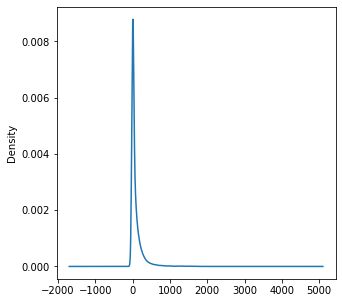

In [12]:
# Univariate analysis
#data1.describe()
#data1.shape
plt.figure(figsize=(5,5))
data1['Administrative_Duration'].plot(kind = 'density')

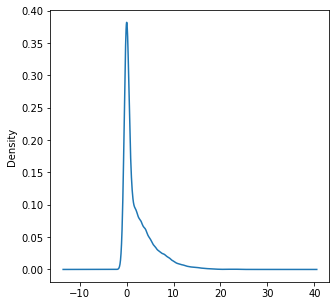

In [13]:
plt.figure(figsize=(5,5))
data1['Administrative'].plot(kind = 'density')

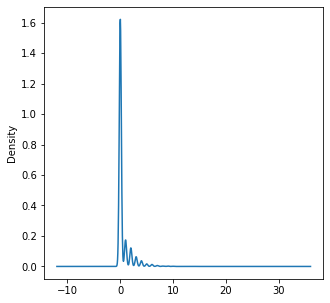

In [14]:
plt.figure(figsize=(5,5))
data1['Informational'].plot(kind = 'density')

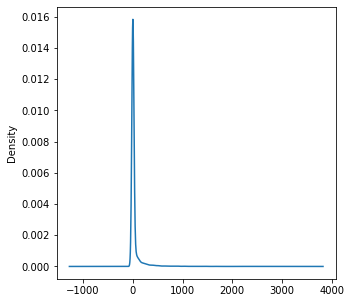

In [15]:
plt.figure(figsize=(5,5))
data1['Informational_Duration'].plot(kind = 'density')

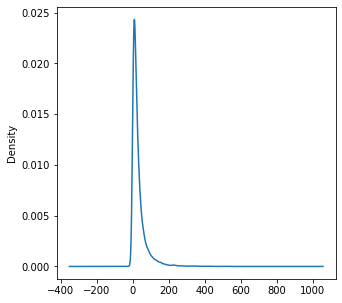

In [16]:
plt.figure(figsize=(5,5))
data1['ProductRelated'].plot(kind = 'density')

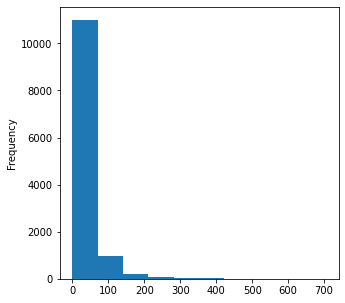

In [17]:
plt.figure(figsize=(5,5))
data1['ProductRelated'].plot(kind = 'hist')

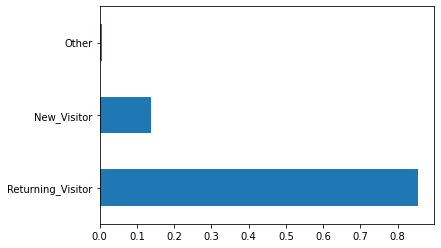

In [18]:
data1.VisitorType.value_counts(normalize=True).plot.barh()
plt.show()

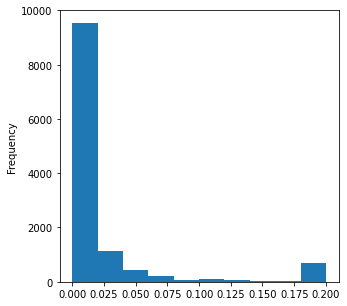

In [19]:
plt.figure(figsize=(5,5))
data1['BounceRates'].plot(kind = 'hist')

### Bivariate data Analysis

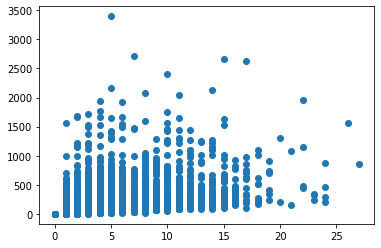

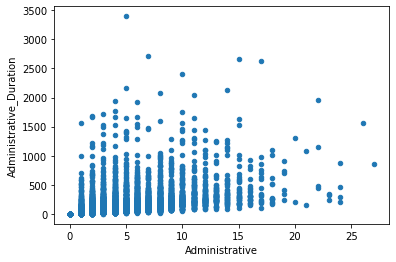

In [20]:
plt.scatter(data1.Administrative,data1.Administrative_Duration)
plt.show()

#plot the scatter plot of balance and age variable in data
data1.plot.scatter(x="Administrative",y="Administrative_Duration")
plt.show()

In [21]:
df = data1.copy()
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


<a name='7'></a>
## 7. Data Preprocessing
for data preprocessing in KMeans since the categorical variables can't ba accepted in the algorithm while they are factors they need to be numerical so first:

**Dummify**
I did get_dummies from the pandas Library

**Scaling**
It is imperative that you normalize your scale of feature values in order to begin with the clustering process. This is because each observations' feature values are represented as coordinates in n-dimensional space (n is the number of features) and then the distances between these coordinates are calculated. If these coordinates are not normalized, then it may lead to false results.

In [22]:
#dummification of categorical variables
df_dc = df_dc = pd.get_dummies(df, columns=['Month', 'OperatingSystems',	'Browser',	'Region',	'TrafficType', 'VisitorType', 'Weekend', 'Revenue'])

In [23]:
df_dc.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'Traff

### Scaling the data
Standardize features by removing the mean and scaling to unit variance this is standard scaler from sklearn library.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

All distance-based algorithms need the data to be standardized so that no one attribute gets undue importance just because the range of the values is more.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_dc)

pd.DataFrame(scaled_df).describe()
ps = pd.DataFrame(scaled_df)
ps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76
0,-0.697582,-0.457476,-0.396631,-0.245039,-0.691501,-0.624793,3.672627,3.235371,-0.317376,-0.309014,-0.190889,-0.403849,8.120024,-0.19066,-0.154739,-0.426299,-0.612885,-0.567224,-0.216,-0.19429,1.941635,-1.073321,-0.511242,-0.200944,-0.022077,-0.039308,-0.023847,-0.080348,2.002134,-1.349643,-0.092730,-0.251925,-0.198526,-0.11971,-0.063202,-0.105275,-0.009011,-0.115812,-0.022077,-0.028506,-0.070552,1.256904,-0.318454,-0.492223,-0.325366,-0.162539,-0.264273,-0.25663,-0.191117,-0.208055,2.009796,-0.681887,-0.446996,-0.308298,-0.146854,-0.193388,-0.057082,-0.169257,-0.058497,-0.19474,-0.143058,-0.009011,-0.252289,-0.032506,-0.054893,-0.015609,-0.009011,-0.028506,-0.037178,-0.127825,-0.39935,-0.083364,0.410894,0.550584,-0.550584,0.428159,-0.428159
1,-0.697582,-0.457476,-0.396631,-0.245039,-0.669024,-0.591360,-0.457458,1.174592,-0.317376,-0.309014,-0.190889,-0.403849,8.120024,-0.19066,-0.154739,-0.426299,-0.612885,-0.567224,-0.216,-0.19429,-0.515030,0.931688,-0.511242,-0.200944,-0.022077,-0.039308,-0.023847,-0.080348,-0.499467,0.740937,-0.092730,-0.251925,-0.198526,-0.11971,-0.063202,-0.105275,-0.009011,-0.115812,-0.022077,-0.028506,-0.070552,1.256904,-0.318454,-0.492223,-0.325366,-0.162539,-0.264273,-0.25663,-0.191117,-0.208055,-0.497563,1.466519,-0.446996,-0.308298,-0.146854,-0.193388,-0.057082,-0.169257,-0.058497,-0.19474,-0.143058,-0.009011,-0.252289,-0.032506,-0.054893,-0.015609,-0.009011,-0.028506,-0.037178,-0.127825,-0.39935,-0.083364,0.410894,0.550584,-0.550584,0.428159,-0.428159
2,-0.697582,-0.463131,-0.396631,-0.252141,-0.691501,-0.625315,3.672627,3.235371,-0.317376,-0.309014,-0.190889,-0.403849,8.120024,-0.19066,-0.154739,-0.426299,-0.612885,-0.567224,-0.216,-0.19429,-0.515030,-1.073321,-0.511242,4.976514,-0.022077,-0.039308,-0.023847,-0.080348,2.002134,-1.349643,-0.092730,-0.251925,-0.198526,-0.11971,-0.063202,-0.105275,-0.009011,-0.115812,-0.022077,-0.028506,-0.070552,-0.795606,-0.318454,-0.492223,-0.325366,-0.162539,-0.264273,-0.25663,-0.191117,4.806429,-0.497563,-0.681887,2.237158,-0.308298,-0.146854,-0.193388,-0.057082,-0.169257,-0.058497,-0.19474,-0.143058,-0.009011,-0.252289,-0.032506,-0.054893,-0.015609,-0.009011,-0.028506,-0.037178,-0.127825,-0.39935,-0.083364,0.410894,0.550584,-0.550584,0.428159,-0.428159
3,-0.697582,-0.457476,-0.396631,-0.245039,-0.669024,-0.623399,0.575063,1.998904,-0.317376,-0.309014,-0.190889,-0.403849,8.120024,-0.19066,-0.154739,-0.426299,-0.612885,-0.567224,-0.216,-0.19429,-0.515030,-1.073321,1.956021,-0.200944,-0.022077,-0.039308,-0.023847,-0.080348,-0.499467,0.740937,-0.092730,-0.251925,-0.198526,-0.11971,-0.063202,-0.105275,-0.009011,-0.115812,-0.022077,-0.028506,-0.070552,-0.795606,3.140170,-0.492223,-0.325366,-0.162539,-0.264273,-0.25663,-0.191117,-0.208055,-0.497563,-0.681887,-0.446996,3.243616,-0.146854,-0.193388,-0.057082,-0.169257,-0.058497,-0.19474,-0.143058,-0.009011,-0.252289,-0.032506,-0.054893,-0.015609,-0.009011,-0.028506,-0.037178,-0.127825,-0.39935,-0.083364,0.410894,0.550584,-0.550584,0.428159,-0.428159
4,-0.697582,-0.457476,-0.396631,-0.245039,-0.489202,-0.296996,-0.044449,0.144202,-0.317376,-0.309014,-0.190889,-0.403849,8.120024,-0.19066,-0.154739,-0.426299,-0.612885,-0.567224,-0.216,-0.19429,-0.515030,-1.073321,1.956021,-0.200944,-0.022077,-0.039308,-0.023847,-0.080348,-0.499467,-1.349643,10.784027,-0.251925,-0.198526,-0.11971,-0.063202,-0.105275,-0.009011,-0.115812,-0.022077,-0.028506,-0.070552,1.256904,-0.318454,-0.492223,-0.325366,-0.162539,-0.264273,-0.25663,-0.191117,-0.208055,-0.497563,-0.681887,-0.446996,3.243616,-0.146854,-0.193388,-0.057082,-0.169257,-0.058497,-0.19474,-0.143058,-0.009011,-0.252289,-0.032506,-0.054893,-0.015609,-0.009011,-0.028506,-0.037178,-0.127825,-0.39935,-0.083364,0.410894,-1.816254,1.816254,0.428159,-0.428159


We have alot of features so we can't visualize all these features,this is where **PCA** comes in. Basic idea behind this is that it allows us to reduce the dimensions (or features) of our dataset to any number less than current number of features.
For my case i converted the dataset from multidimensions to 2 dimensions.

In [25]:
from sklearn.decomposition import PCA
SEED = 1234
pca = PCA(n_components=2, random_state=SEED)
pca.fit(scaled_df)


PCA(n_components=2, random_state=1234)

In [26]:
traindf = pca.transform(scaled_df)

In [27]:
traindf

array([[-4.5822139 ,  0.55141293],
       [-1.42472847, -0.63354587],
       [-4.57379035,  1.52113677],
       ...,
       [-1.67749158, -0.92587436],
       [ 0.09729108, -0.66886049],
       [ 0.04302972,  1.1432241 ]])

<a name='8'></a>
## 8. Modeling

Now I will train my model based on the new features generated by PCA(). Since I have only 2 Principal Components (PC1 and PC2), I will get a 2D figure with n clusters where the best number of cluster from  silhouette_score will be considered and be used for clustering

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(traindf)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(traindf, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

### visualize the n_clusters and clusters inertia


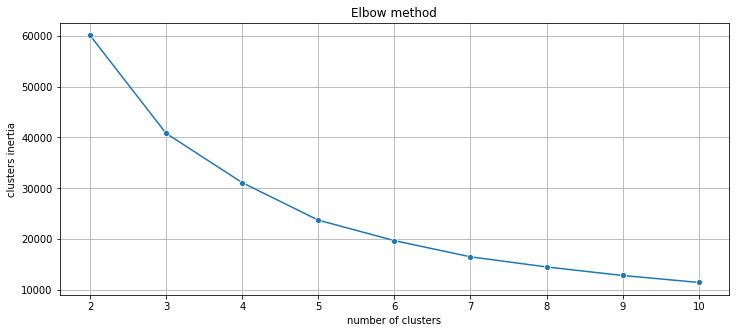

In [30]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
plt.grid()
plt.show()#we can choose 3 as no. of clusters, this method shows what is the good number of clusters.

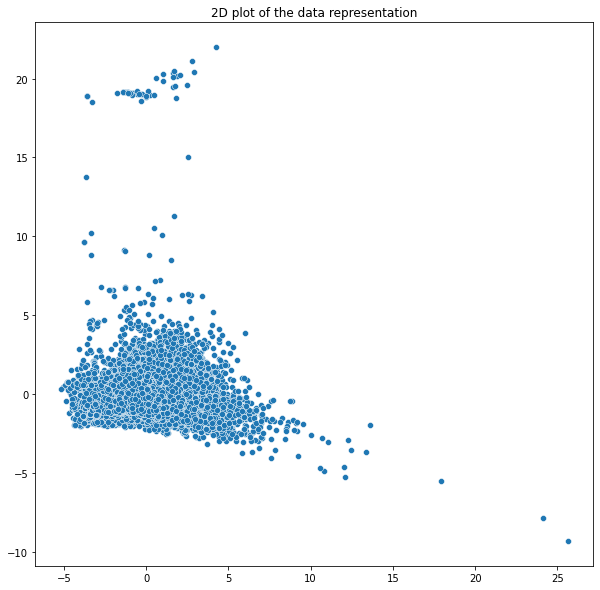

In [31]:
#plotting the 2d way from PCA
plt.figure(figsize=(10 ,10))
plt.title("2D plot of the data representation")
sns.scatterplot(traindf[: , 0] , traindf[: , 1])

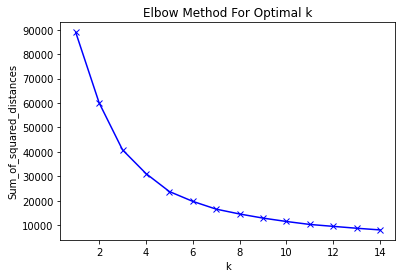

In [32]:
Sum_of_squared_distances = []
for k in range(1,15):
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(traindf)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(range(1,15), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k') 
plt.show()

In [33]:
km.cluster_centers_

array([[-3.32051011,  0.78516339],
       [-0.3552242 , -0.70481836],
       [ 2.65716281,  1.81864166],
       [-0.28411841, 19.17170158],
       [-1.18069318,  0.91594903],
       [10.93575086, -3.15177791],
       [ 4.89676726, -1.24841342],
       [ 2.47438862, -0.50998406],
       [-3.30840075, -1.10486567],
       [ 0.88501847, -0.89583349],
       [ 0.25231025,  2.65612371],
       [-1.43633232, -0.97135921],
       [-0.98246341,  6.19751256],
       [ 0.6871686 ,  0.88146502]])

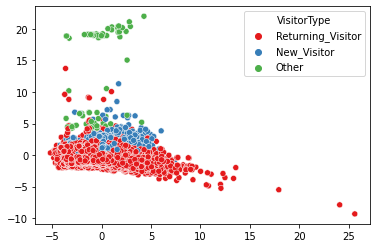

In [34]:
#visualizing data according to the different clusters
sns.scatterplot(traindf[:,0],traindf[:,1],data=data1,hue='VisitorType',palette="Set1")
plt.show()

In [35]:
df['labels']=km.labels_

In [36]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,labels
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,11
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,8
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,11


In [37]:
df['labels'].value_counts()#number of labels after grouping

1     2335
11    1920
9     1452
13    1412
4     1373
7     1046
8      651
2      577
10     527
0      456
6      419
12      62
3       53
5       33
Name: labels, dtype: int64

In [38]:
df3 = df[df['labels'] == 10]#check for a given group with same characteristics
df3.head(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,labels
202,5.0,218.0,0.0,0.0,13.0,284.5,0.0,0.004167,0.00,0.0,Mar,1,1,1,2,New_Visitor,False,False,10
272,1.0,28.0,1.0,47.0,13.0,224.5,0.0,0.014286,0.00,0.0,Mar,1,1,1,8,New_Visitor,False,False,10
276,4.0,15.0,0.0,0.0,10.0,197.2,0.0,0.016667,38.99,0.0,Mar,1,1,1,3,Returning_Visitor,True,True,10
